# Power Consumption Trend Analysis

# ***Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the Dataset

In [ ]:
df=pd.read_csv('/data/power_consumption_india.csv')
df

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3




# Display basic info

In [3]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 non-null    float64
 16  Andhra Prade

# Rename "Unnamed: 0" to "Date"

In [11]:
df.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


# Convert "Date" column to datetime format

In [14]:

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.dtypes

,0
Date,datetime64[ns]
Punjab,float64
Haryana,float64
Rajasthan,float64
Delhi,float64
UP,float64
Uttarakhand,float64
HP,float64
J&K,float64
Chandigarh,float64


# Data Cleaning

In [15]:
# Count missing values
print("Missing values in each state:")
print(df.isnull().sum())

# remove missing value
df_cleaned = df.dropna()

# Check again
print("Missing values after filling:")
print(df_cleaned.isnull().sum())

Missing values in each state:
Date                 305
Punjab                 0
Haryana                0
Rajasthan              0
Delhi                  0
UP                     0
Uttarakhand            0
HP                     0
J&K                    0
Chandigarh             0
Chhattisgarh           0
Gujarat                0
MP                     0
Maharashtra            0
Goa                    0
DNH                    0
Andhra Pradesh         0
Telangana              0
Karnataka              0
Kerala                 0
Tamil Nadu             0
Pondy                  0
Bihar                  0
Jharkhand              0
Odisha                 0
West Bengal            0
Sikkim                 0
Arunachal Pradesh      0
Assam                  0
Manipur                0
Meghalaya              0
Mizoram                0
Nagaland               0
Tripura                0
dtype: int64
Missing values after filling:
Date                 0
Punjab               0
Haryana              0
Rajastha

In [18]:
# 🔹 Sort the index to allow proper time slicing
df_cleaned = df_cleaned.sort_index()

# National average per day (across all states)
national_daily = df_cleaned.mean(axis=1)

# 🔹 Now slicing will work
before_lockdown = national_daily.loc["2019-03-01":"2019-05-31"].mean()
during_lockdown = national_daily.loc["2020-03-01":"2020-05-31"].mean()

# Line Plot: National Daily Trend

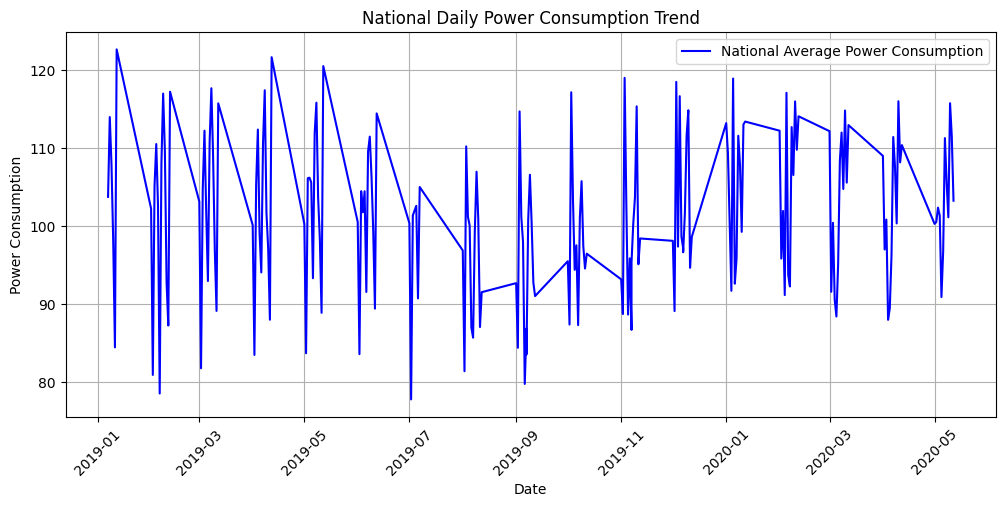

In [19]:
# Plot the national daily trend
plt.figure(figsize=(12, 5))
plt.plot(national_daily, color='b', label="National Average Power Consumption")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.title("National Daily Power Consumption Trend")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

# Power Consumption Trend During COVID-19 Lockdown

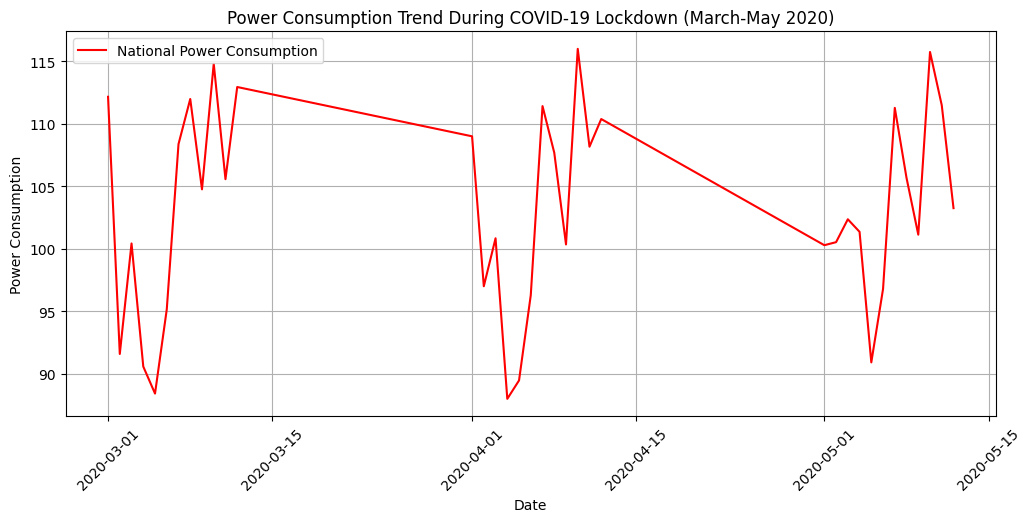

In [23]:
covid_data = df_cleaned.loc["2020-03-01":"2020-05-31"]
plt.figure(figsize=(12, 5))
plt.plot(covid_data.mean(axis=1), color='r', label="National Power Consumption")

plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.title("Power Consumption Trend During COVID-19 Lockdown (March-May 2020)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Power Consumption for Different States

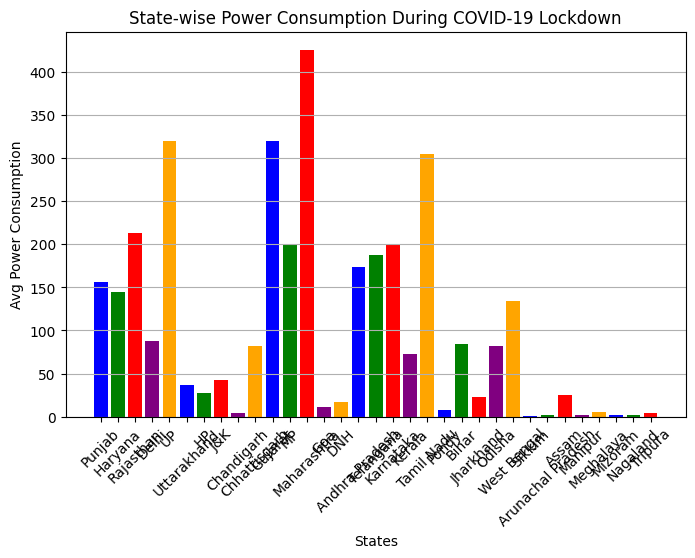

In [24]:
# Compute the mean power consumption during COVID-19 for each state
statewise_covid = covid_data.mean()

plt.figure(figsize=(8, 5))
plt.bar(statewise_covid.index, statewise_covid.values, color=['blue', 'green', 'red', 'purple', 'orange'])

plt.xlabel("States")
plt.ylabel("Avg Power Consumption")
plt.title("State-wise Power Consumption During COVID-19 Lockdown")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
